In [89]:
# !pip install fancyimpute
import numpy as np
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [90]:
'''
pre-processes melanoma data

'''

'\npre-processes melanoma data\n\n'

In [91]:
# read in data

raw_data = pd.read_csv('../Melanoma/total_PD_1.csv')
raw_data.tail()

/var/folders/cn/ccmq_jg52yxblqm5cp00kr400000gn/T/ipykernel_73582/107892282.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('../Melanoma/total_PD_1.csv')


,Unnamed: 0,GSM2445716,GSM2445717,GSM2445718,GSM2445719,GSM2445720,GSM2445721,GSM2445722,GSM2445723,GSM2445724,...,SRR5088909,SRR5088911,SRR5088913,SRR5088914,SRR5088916,SRR5088920,SRR5088922,SRR5088924,SRR5088926,SRR5088929
56265,snoZ6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56266,snosnR66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56267,uc_338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003664563208162,0.031978130771298,0.0857459707118245,0.04071053428664,0.0512846604842121,0.158733159882816,0.18278951659712,0.0657273971922831,0.0777414803400673,0.0
56268,yR211F11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0355281824962792,0.0
56269,Response,N,N,N,N,N,N,N,N,N,...,N,R,N,N,N,N,N,R,N,R


In [139]:
# some re-formatting

# rename column

raw_data = raw_data.rename(columns={raw_data.columns[0]: 'patient'})
print(raw_data.shape)

#drop GSE931
raw_data_drop = raw_data.drop(raw_data.columns[raw_data.columns.str.contains("GSM24457")], axis=1)
print(raw_data_drop.shape)

# drop PRJ
raw_data_drop = raw_data_drop.drop(raw_data.columns[raw_data.columns.str.contains("ERR")], axis=1)
print(raw_data_drop.shape)

# transpose so columns are genes and rows are patients
t_data = raw_data_drop.set_index('patient').T
# t_data = raw_data.set_index('patient').T
print(t_data.shape)

# drop rows(patient) with resopnse = UNK

t_data = t_data[t_data["Response"] != "UNK"]
print(t_data.shape)
# split data

labels = t_data['Response']
clean_data= t_data.drop(columns = ['Response'])


(56270, 158)
(56270, 133)
(56270, 92)
(91, 56270)
(84, 56270)


In [140]:
print(clean_data.index)

Index(['SRR7344546', 'SRR7344554', 'SRR7344556', 'SRR7344564', 'SRR7344565',
       'SRR7344567', 'SRR7344574', 'SRR7344575', 'SRR3184279', 'SRR3184280',
       'SRR3184281', 'SRR3184282', 'SRR3184283', 'SRR3184284', 'SRR3184285',
       'SRR3184286', 'SRR3184287', 'SRR3184288', 'SRR3184289', 'SRR3184290',
       'SRR3184291', 'SRR3184293', 'SRR3184294', 'SRR3184295', 'SRR3184296',
       'SRR3184297', 'SRR3184298', 'SRR3184299', 'SRR3184300', 'SRR3184301',
       'SRR3184302', 'SRR3184303', 'SRR3184304', 'SRR3184305', 'SRR3184306',
       'SRR5088813', 'SRR5088815', 'SRR5088819', 'SRR5088821', 'SRR5088822',
       'SRR5088824', 'SRR5088826', 'SRR5088829', 'SRR5088831', 'SRR5088834',
       'SRR5088836', 'SRR5088839', 'SRR5088840', 'SRR5088843', 'SRR5088846',
       'SRR5088849', 'SRR5088850', 'SRR5088853', 'SRR5088856', 'SRR5088857',
       'SRR5088861', 'SRR5088864', 'SRR5088866', 'SRR5088867', 'SRR5088872',
       'SRR5088878', 'SRR5088880', 'SRR5088883', 'SRR5088885', 'SRR5088887',

In [142]:
# drop any genes with > 90% missing data


clean_data= clean_data.dropna(thresh = clean_data.shape[0]*0.9, axis=1)
print(clean_data.shape)


(84, 56269)


In [143]:
zero_percent = (clean_data== 0).mean(axis=0)
print(zero_percent.shape)
print(zero_percent.max())

(56269,)
1.0


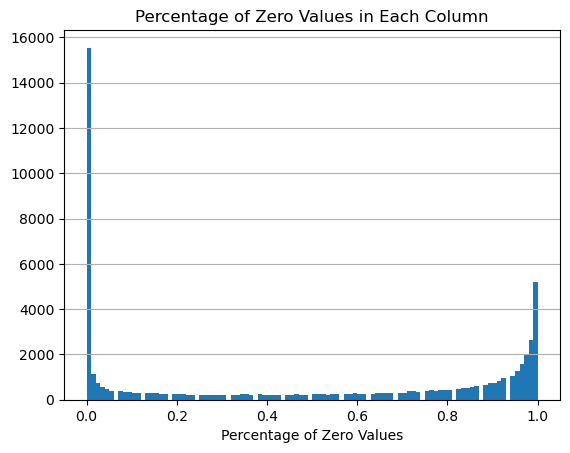

In [144]:
plt.hist(zero_percent, bins=100)
plt.xlabel('Percentage of Zero Values')
plt.title('Percentage of Zero Values in Each Column')
plt.grid(axis='y') 
plt.show()

In [145]:
# drop genes with >80% 0 input 
zero_percent = (clean_data == 0). mean(axis = 0)
clean_data = clean_data.loc[:,zero_percent<0.8]
print(clean_data.shape)

(84, 35548)


In [146]:
clean_data_numeric = clean_data.apply(pd.to_numeric, errors='coerce')


In [147]:
col_var = clean_data_numeric.var()
print(col_var.idxmax())
print(col_var.max())
clean_data_numeric["RN7SL2"]

RN7SL2
172718741.04970133


SRR7344546     33644.454092
SRR7344554     40729.807664
SRR7344556    109408.937655
SRR7344564        70.048934
SRR7344565       105.676179
                  ...      
SRR5088920        16.198037
SRR5088922         7.561333
SRR5088924         5.673804
SRR5088926         7.899099
SRR5088929         8.693633
Name: RN7SL2, Length: 84, dtype: float64

In [148]:
col_var_more_than_5000 = col_var[col_var >= 5000]

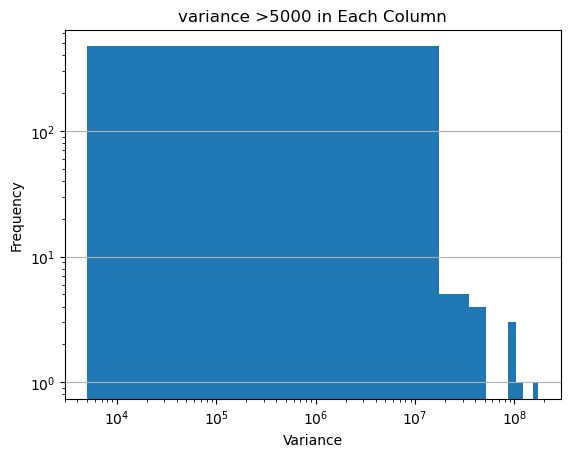

In [149]:
plt.hist(col_var_more_than_5000)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('variance >5000 in Each Column')
plt.grid(axis='y') 
plt.show()

In [150]:
top_100_var = col_var.nlargest(100)
top_100_var.to_csv("top_100_var.csv")

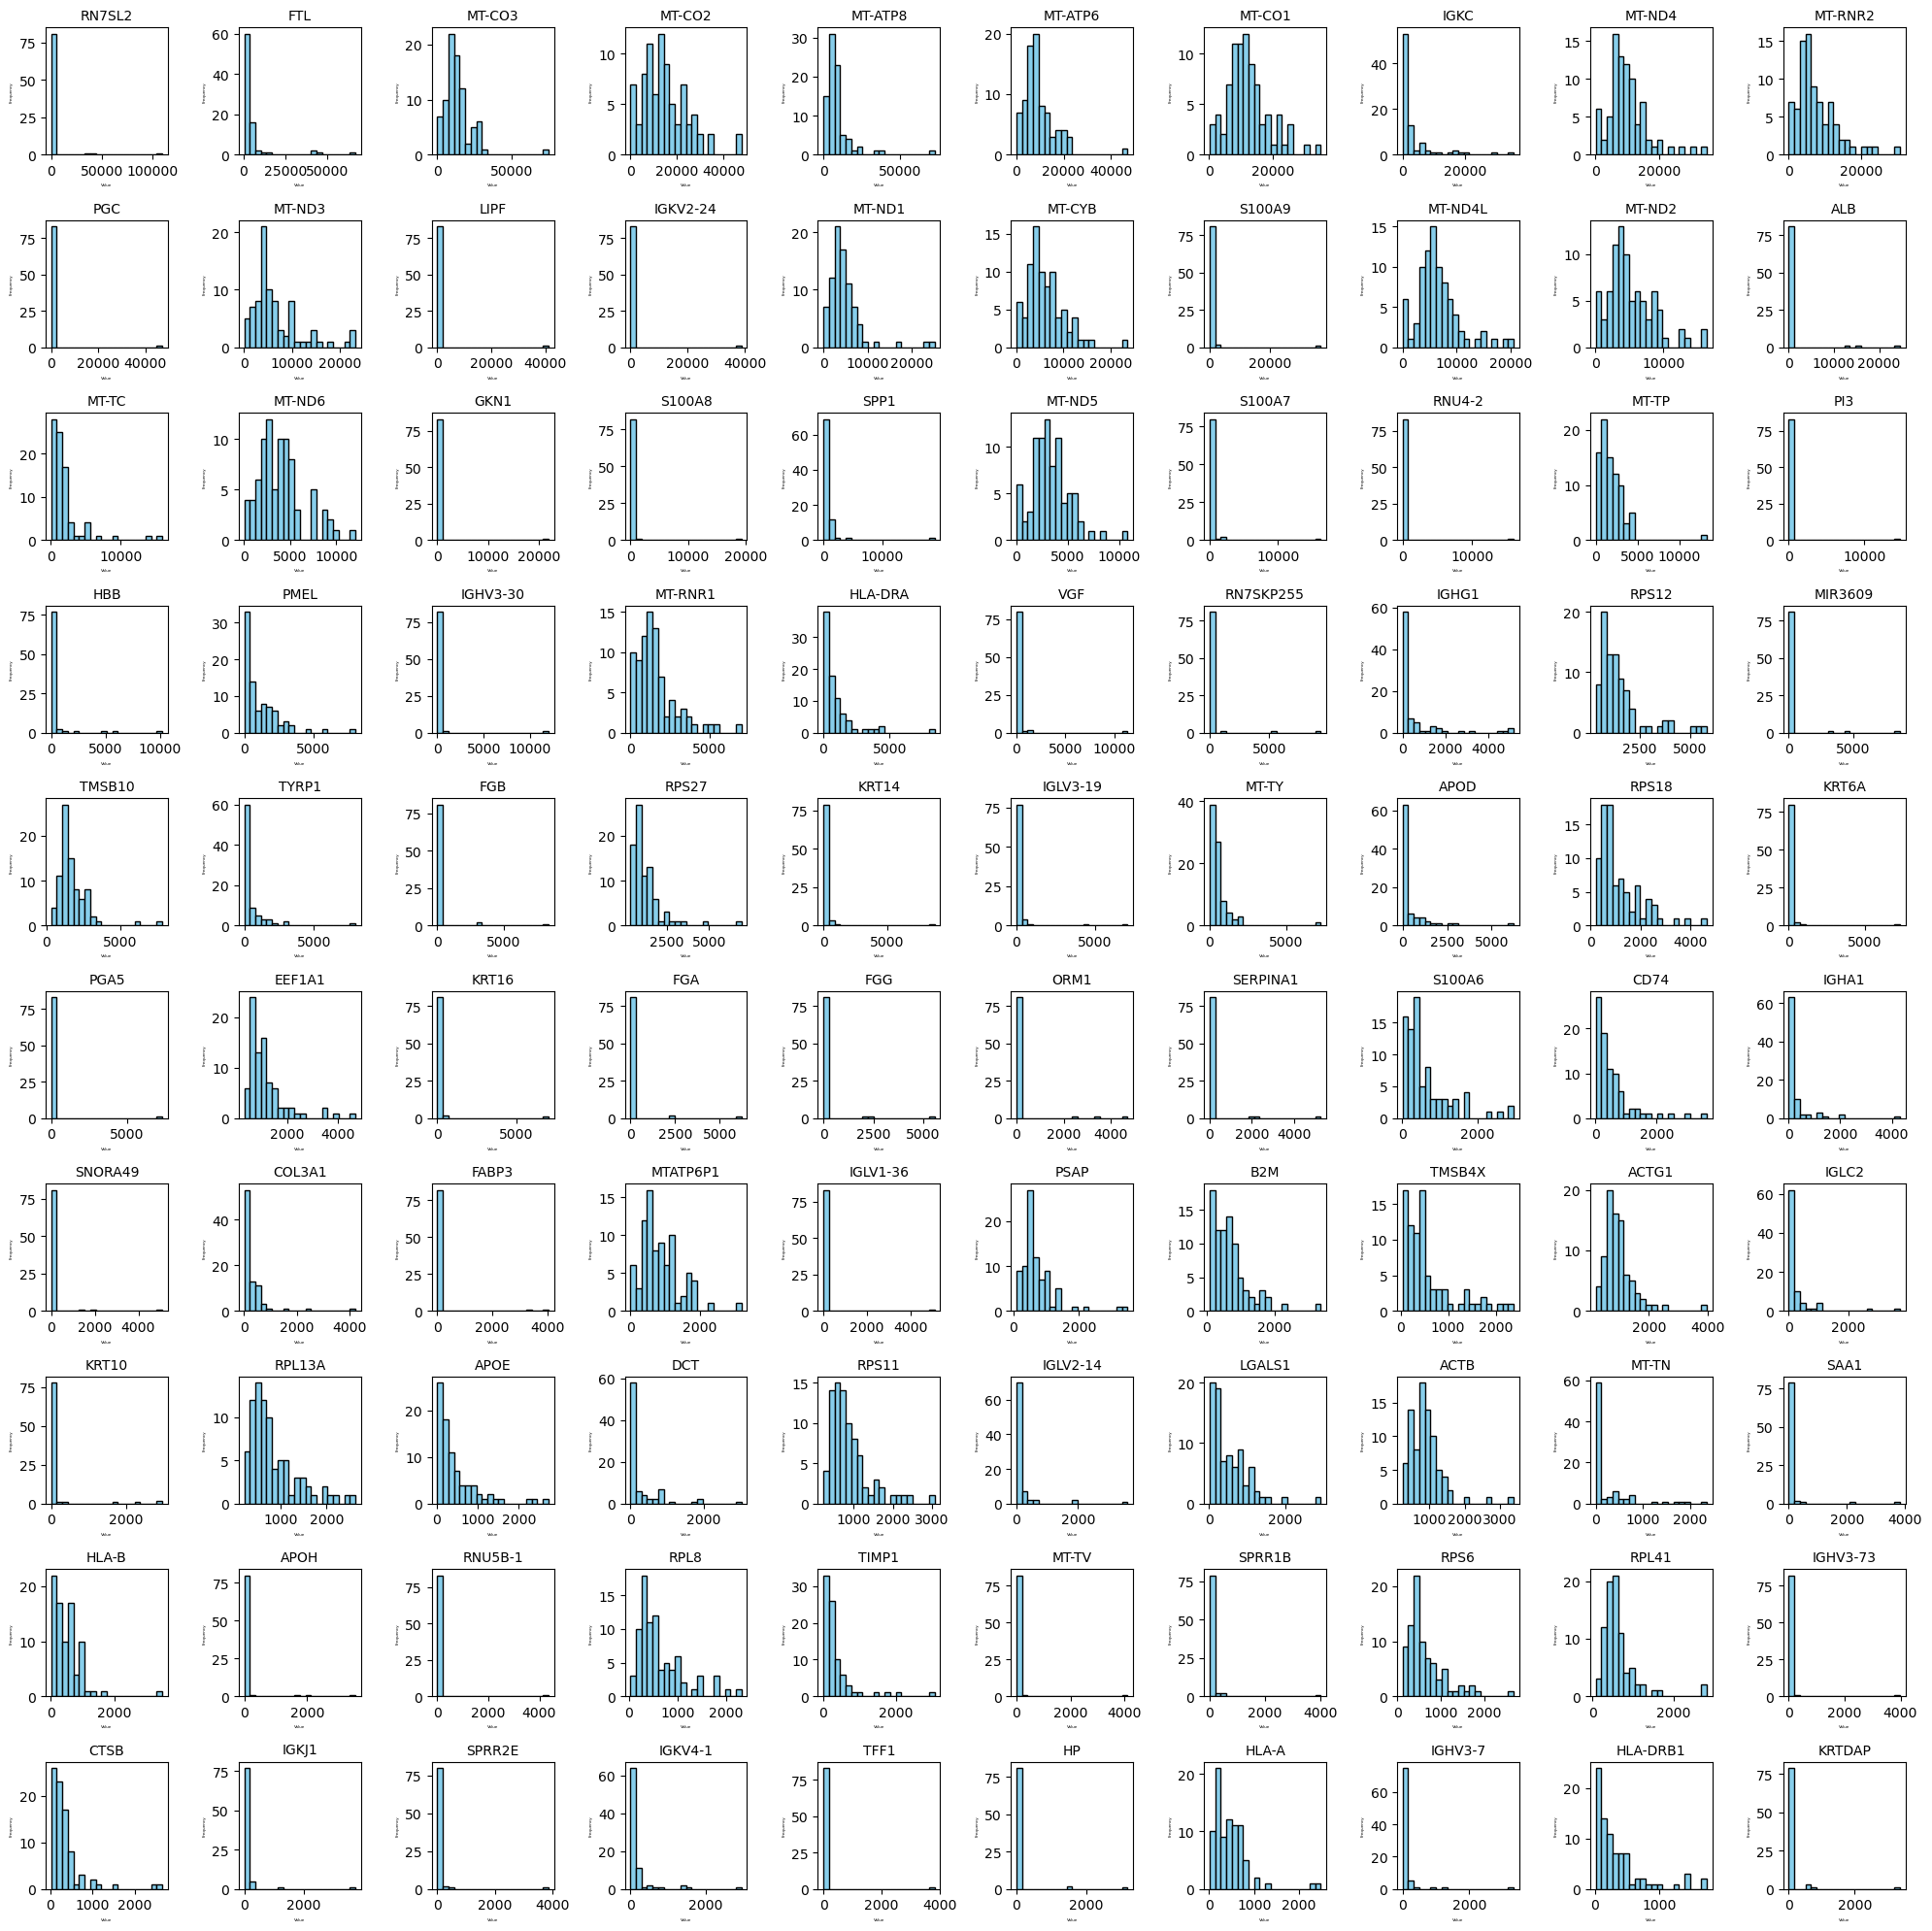

In [151]:
fig, axs = plt.subplots(10, 10, figsize=(20, 20))

axs = axs.flatten()


for i, gene in enumerate(top_100_var.index):

    gene_data = clean_data_numeric[gene]
    
    axs[i].hist(gene_data, bins=20, color='skyblue', edgecolor='black')
    
    axs[i].set_title(f'{gene}', fontsize=10)
    axs[i].set_xlabel('Value', fontsize=3)
    axs[i].set_ylabel('Frequency', fontsize=3)
    

plt.tight_layout()

plt.show()

In [152]:
top_100_var_data = clean_data_numeric[top_100_var.index]
print(top_100_var_data)

patient            RN7SL2           FTL        MT-CO3        MT-CO2  \
SRR7344546   33644.454092   1231.617313     67.426776     64.339660   
SRR7344554   40729.807664    787.335580    928.541945    853.233095   
SRR7344556  109408.937655    857.066598   1071.769147   1693.762112   
SRR7344564      70.048934   3472.052260   2214.160034   1878.942823   
SRR7344565     105.676179   3693.938050   1560.394044   1213.931068   
...                   ...           ...           ...           ...   
SRR5088920      16.198037   1814.055509  11013.345486   9488.733302   
SRR5088922       7.561333   1529.834995   9810.250395  12216.453037   
SRR5088924       5.673804   3084.589815   5596.764680   6814.939451   
SRR5088926       7.899099   3317.386985  16743.654778  20187.018760   
SRR5088929       8.693633  42142.557683  15177.616694  16782.852187   

patient         MT-ATP8      MT-ATP6        MT-CO1         IGKC        MT-ND4  \
SRR7344546    30.916026    27.419759    191.705397    49.113070   

In [130]:
# log2 transformation

# note that samples from the Melanoma dataset GSE931 are already log2 transformed

# add 1 to all values for log2 transformation

top_100_var_data = top_100_var_data.applymap(lambda x: x+1 if isinstance(x, (int, float)) else x)

# subset GSE931 samples from rest
# gse931 = clean_data[clean_data.index.str.contains('GSM24457')]

# to_transform = clean_data[~clean_data.index.str.contains("GSM24457")]

# log2 transform
to_transform = top_100_var_data
log2_data = to_transform.applymap(lambda x: np.log2(x) if isinstance(x, (int, float)) else x)

# re-join data

# log2_data = pd.concat([gse931, log2_data], axis = 0)
log2_data.head()


/var/folders/cn/ccmq_jg52yxblqm5cp00kr400000gn/T/ipykernel_73582/4049563201.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_100_var_data = top_100_var_data.applymap(lambda x: x+1 if isinstance(x, (int, float)) else x)
/var/folders/cn/ccmq_jg52yxblqm5cp00kr400000gn/T/ipykernel_73582/4049563201.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  log2_data = to_transform.applymap(lambda x: np.log2(x) if isinstance(x, (int, float)) else x)


patient,RN7SL2,FTL,MT-CO3,MT-CO2,MT-ATP8,MT-ATP6,MT-CO1,IGKC,MT-ND4,MT-RNR2,...,CTSB,IGKJ1,SPRR2E,IGKV4-1,TFF1,HP,HLA-A,IGHV3-7,HLA-DRB1,KRTDAP
SRR7344546,15.038124,10.267509,6.096489,6.029887,4.996209,4.828822,7.590253,5.647115,5.412997,5.024420,...,7.253257,0.000000,0.000000,0.217787,0.0,0.474323,9.465274,0.000000,8.906496,0.000000
SRR7344554,15.313833,9.622666,9.860376,9.738486,9.475843,9.217649,10.936979,5.360864,8.928858,7.789543,...,7.433607,0.000000,0.185674,3.118167,0.0,0.052839,7.720830,0.000000,5.987946,0.204788
SRR7344556,16.739384,9.744946,10.067124,10.726867,8.760113,8.636872,11.444593,9.147465,8.696023,6.988178,...,5.344500,1.691215,0.000000,0.558147,0.0,0.066288,3.604023,0.259431,5.674888,0.000000
SRR7344564,6.150741,11.761988,11.113195,10.876473,9.272044,10.677880,11.052563,10.066972,10.668391,9.690645,...,7.083906,4.836296,0.000000,5.996376,0.0,0.429230,8.847922,2.360120,8.026241,0.132312
SRR7344565,6.737094,11.851334,10.608619,10.246659,8.657706,9.951498,10.451394,10.013964,9.771394,9.228568,...,7.081397,2.933361,4.917178,4.459239,0.0,0.128755,9.050430,4.492624,8.053082,5.337647


In [131]:
# z-score transformation (for PCA)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(log2_data)

scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()
print(scaled_data.shape)

(84, 100)


In [132]:
# export '/content/total_PD_1.csv'

# imputed log2 transformed data
# imputed_data.to_csv('imputed_data_v3.csv')

#log2 transformed
log2_data.to_csv('log2_top_100.csv')

# normalized version of above^ (for PCA)
scaled_data.to_csv('scaled_top_100.csv')

# true labels (response y/n)
labels.to_csv('labels_top_100.csv')